In [1]:
library(tidymodels)
library(tidyverse)
set.seed(45)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.7
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ forcats 0.5.1
✔ stringr 1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() 

In [2]:
music_data <- read_csv("features_30_sec.csv")
music_data <- music_data |> mutate(label = as.factor(label)) |> filter(label %in% c("classical", "jazz", "pop", "rock"))
music_data |> head()


Rows: 1000 Columns: 60
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): filename, label
dbl (58): length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spec...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,⋯,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
classical.00000.wav,661794,0.2523919,0.08415318,0.03624489,0.0002207507,1505.166,44457.89,1559.006,43682.97,⋯,86.13791,-0.3207830,100.82709,1.7729851,95.44073,0.889234,97.13333,-0.8420249,120.86579,classical
classical.00001.wav,661794,0.2149950,0.08500956,0.03062517,0.0001609684,1360.644,61611.21,1441.243,32378.73,⋯,158.49814,-4.2898464,75.67643,0.5910091,134.61771,2.877631,153.63055,0.3732806,123.70739,classical
classical.00002.wav,661794,0.2779581,0.08375870,0.04385955,0.0001926202,1490.275,38993.34,1600.116,31200.90,⋯,85.15092,-1.3094325,77.17075,2.9451773,74.20265,-1.655027,59.09608,-2.8961926,53.00043,classical
classical.00003.wav,661794,0.2342293,0.08345093,0.02944208,0.0003565407,1526.630,91344.31,1499.439,60196.23,⋯,125.19710,0.5973887,111.53961,-0.5956837,151.71991,2.341259,133.90228,2.6405358,210.36562,classical
classical.00004.wav,661794,0.2215738,0.08499950,0.04231631,0.0002093876,1705.563,68132.45,1646.064,25963.46,⋯,83.13835,-4.1252985,69.47055,-4.7877712,131.77634,-4.774069,115.44781,-4.6037269,217.12201,classical
classical.00005.wav,661794,0.2685303,0.08254110,0.04326224,0.0005845473,1431.055,74049.94,1558.113,39297.27,⋯,77.83755,3.3587773,86.31481,4.8134193,78.53747,1.758111,73.02351,-1.8308470,89.70669,classical


In [3]:
music_split <- music_data |> initial_split(prop = 0.75, strata = label)
music_training <- training(music_split)
music_testing <- testing(music_split)


In [13]:
vfolds <- vfold_cv(music_training, v = 5, strata = label)
kvals <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

In [14]:
music_recipe <- recipe(label ~ rms_mean + spectral_bandwidth_mean + chroma_stft_mean + zero_crossing_rate_mean + rms_var + zero_crossing_rate_var, data = music_training) |> step_center(all_predictors()) |> step_scale(all_predictors())
music_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> set_engine("kknn") |> set_mode("classification")

music_workflow <- workflow() |> add_recipe(music_recipe) |> add_model(music_model) |> tune_grid(resamples = vfolds, grid = kvals)


! Fold1: internal:
  No observations were detected in `truth` for level(s): 'blues', 'count...
  Computation will proceed by ignoring those levels.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'blues', 'count...
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'blues', 'count...
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): 'blues', 'count...
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): 'blues', 'count...
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,multiclass,0.8133333,5,0.02321398,Preprocessor1_Model05
18,accuracy,multiclass,0.8133333,5,0.02198484,Preprocessor1_Model18
16,accuracy,multiclass,0.8100000,5,0.02013841,Preprocessor1_Model16
17,accuracy,multiclass,0.8100000,5,0.01870829,Preprocessor1_Model17
3,accuracy,multiclass,0.8066667,5,0.01632993,Preprocessor1_Model03
4,accuracy,multiclass,0.8000000,5,0.02527625,Preprocessor1_Model04
19,accuracy,multiclass,0.7966667,5,0.01855921,Preprocessor1_Model19
6,accuracy,multiclass,0.7966667,5,0.02758824,Preprocessor1_Model06
13,accuracy,multiclass,0.7966667,5,0.02656230,Preprocessor1_Model13


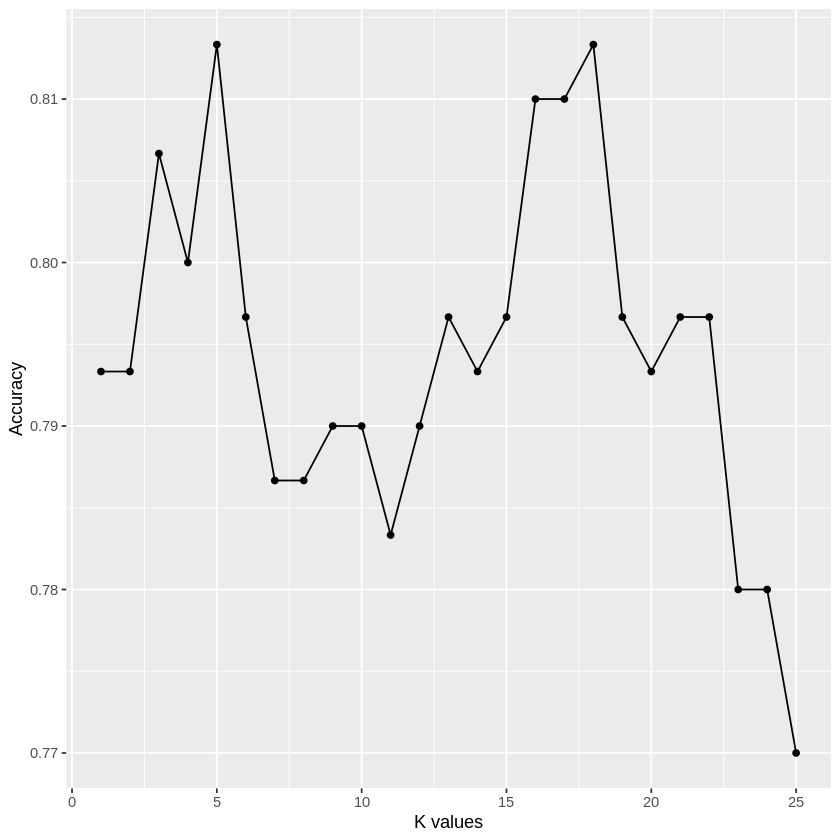

In [17]:
kval_metrics <- music_workflow |> collect_metrics() |> filter(.metric == "accuracy") |> arrange(desc(mean)) 
kval_metrics

kval_plot <- kval_metrics |> ggplot(aes(x = neighbors, y = mean)) + geom_point() + geom_line() + labs(x = "K values", y = "Accuracy")
kval_plot

In [18]:
tuned_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |> set_engine("kknn") |> set_mode("classification")

tuned_workflow <- workflow() |> add_recipe(music_recipe) |> add_model(tuned_model) |> fit(data = music_training)

music_predictions <- tuned_workflow |> predict(music_testing) |> bind_cols(music_testing) 
music_metrics <- music_predictions |> metrics(truth = label, estimate = .pred_class)
music_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.76
kap,multiclass,0.68
